In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Load the dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Hackathon_Working_Data.csv')
df.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [ ]:
df.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


In [ ]:
df.shape

(26985, 14)

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [ ]:
df['STORECODE'].unique

<bound method Series.unique of 0         N1
1         N1
2         N1
3         N1
4         N1
        ... 
26980    N10
26981    N10
26982    N10
26983    N10
26984    N10
Name: STORECODE, Length: 26985, dtype: object>

# Data Preprocessing and Data Cleaning

Check if there are any null values

In [ ]:
df.isnull().sum()
# There are no null values in the given dataset. So, removal of null values are not needed.

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

Replacing the wrong data. The column price is calculated by multiplying the quantity and the value of each item. The price of item is calculated and replaced.

In [ ]:
df['PRICE'] = df['QTY'] * df['VALUE']
selected = ['QTY','VALUE','PRICE']
print(df[selected])

       QTY  VALUE  PRICE
0      1.0  225.0  225.0
1      1.0   95.0   95.0
2      1.0   10.0   10.0
3      1.0  108.0  108.0
4      1.0   19.0   19.0
...    ...    ...    ...
26980  1.0   10.0   10.0
26981  1.0   10.0   10.0
26982  2.0   20.0   40.0
26983  1.0   58.0   58.0
26984  1.0   15.0   15.0

[26985 rows x 3 columns]


Every purchase has an unique Bill id but there are multiple storecode having common bill id. So to get more accurate results, the Storecode and the Bill id are concatenated and formed as an unique id(uid)

In [ ]:
df['UID'] = df['STORECODE'].str.cat(df['BILL_ID'])
df.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UID
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1T375
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1T379
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1T381
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1T382
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1T384


In [ ]:
id_store = df.groupby('STORECODE')['UID'].unique()
for store_code, uids in id_store.items():
    #print(f"Store Code: {store_code}, UIDs: {uids}")

Store Code: N1, UIDs: ['N1T375' 'N1T379' 'N1T381' ... 'N1T9243' 'N1T9251' 'N1T9255']
Store Code: N10, UIDs: ['N10T3' 'N10T17' 'N10T25' ... 'N10T5999' 'N10T6007' 'N10T6013']
Store Code: N2, UIDs: ['N2T2' 'N2T3' 'N2T4' 'N2T5' 'N2T6' 'N2T7' 'N2T9' 'N2T10' 'N2T12' 'N2T13'
 'N2T14' 'N2T15' 'N2T18' 'N2T19' 'N2T20' 'N2T21' 'N2T22' 'N2T23' 'N2T24'
 'N2T25' 'N2T26' 'N2T28' 'N2T29' 'N2T31' 'N2T32' 'N2T33' 'N2T34' 'N2T35'
 'N2T36' 'N2T37' 'N2T38' 'N2T39' 'N2T40' 'N2T41' 'N2T42' 'N2T43' 'N2T46'
 'N2T47' 'N2T48' 'N2T49' 'N2T50' 'N2T51' 'N2T57' 'N2T58' 'N2T59' 'N2T60'
 'N2T62' 'N2T63' 'N2T64' 'N2T65' 'N2T66' 'N2T67' 'N2T69' 'N2T72' 'N2T74'
 'N2T75' 'N2T77' 'N2T79' 'N2T80' 'N2T81' 'N2T82' 'N2T83' 'N2T84' 'N2T87'
 'N2T88' 'N2T89' 'N2T90' 'N2T91' 'N2T93' 'N2T95' 'N2T97' 'N2T99' 'N2T100'
 'N2T101' 'N2T102' 'N2T103' 'N2T105' 'N2T106' 'N2T107' 'N2T108' 'N2T109'
 'N2T110' 'N2T111' 'N2T112' 'N2T113' 'N2T114' 'N2T115' 'N2T117' 'N2T118'
 'N2T122' 'N2T123' 'N2T125' 'N2T126' 'N2T128' 'N2T131' 'N2T132' 'N2T134'


Store Code: N1, Total Sales: 17249174.39
Store Code: N10, Total Sales: 340487.0
Store Code: N2, Total Sales: 6769695.0
Store Code: N3, Total Sales: 263846.79
Store Code: N4, Total Sales: 631869.01
Store Code: N5, Total Sales: 423393.0
Store Code: N6, Total Sales: 178547.0
Store Code: N7, Total Sales: 1162581.14
Store Code: N8, Total Sales: 352333.98
Store Code: N9, Total Sales: 624267.09


**Exploratory Data Analysis**

Visualization of total sales obtained in each month

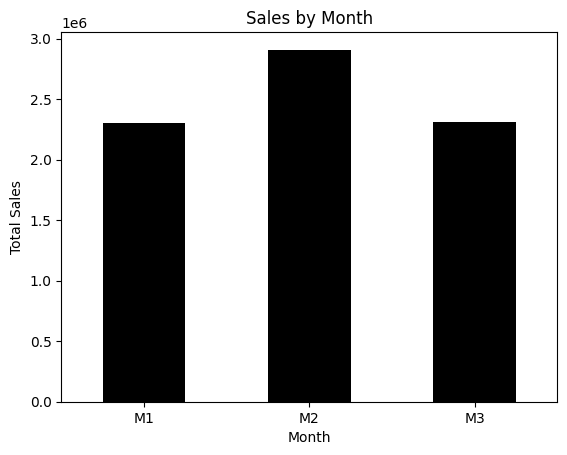

In [ ]:
# Plotting the total sales for each month
monthly_sales = df.groupby('MONTH')['BILL_AMT'].sum()
monthly_sales.plot(kind='bar', color='black')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

Visualization of total sales obtained in each day

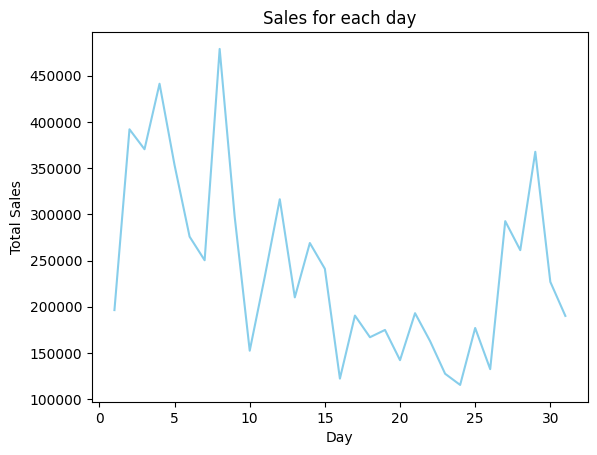

In [ ]:
# Plotting the total sales for each day
daily_sales = df.groupby('DAY')['BILL_AMT'].sum()
daily_sales.plot(kind='line', color='skyblue')
plt.title('Sales for each day')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

**Average Price per Quantity**

Calculating the average price per quantity of the product to gain better understanding of pricing.

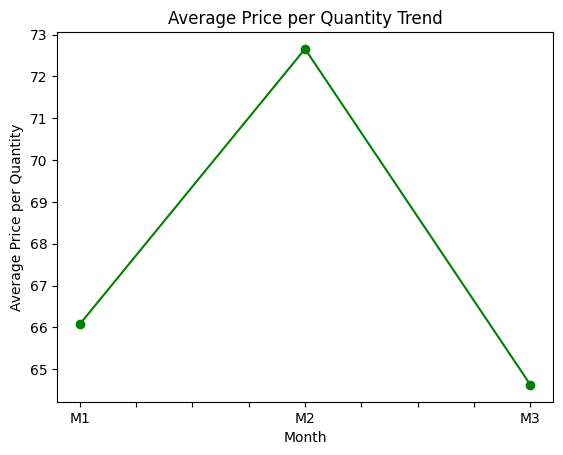

In [ ]:
df['Avg_Price_Per_Qty'] = df['PRICE'] / df['QTY']
average_price_per_qty = df.groupby('MONTH')['Avg_Price_Per_Qty'].mean()
average_price_per_qty.plot(kind='line', marker='o', color='green')
plt.title('Average Price per Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Average Price per Quantity')
plt.show()

Understanding about the Total sales obtained in the various fiedls such as the Group, Sub Group , Brand ...

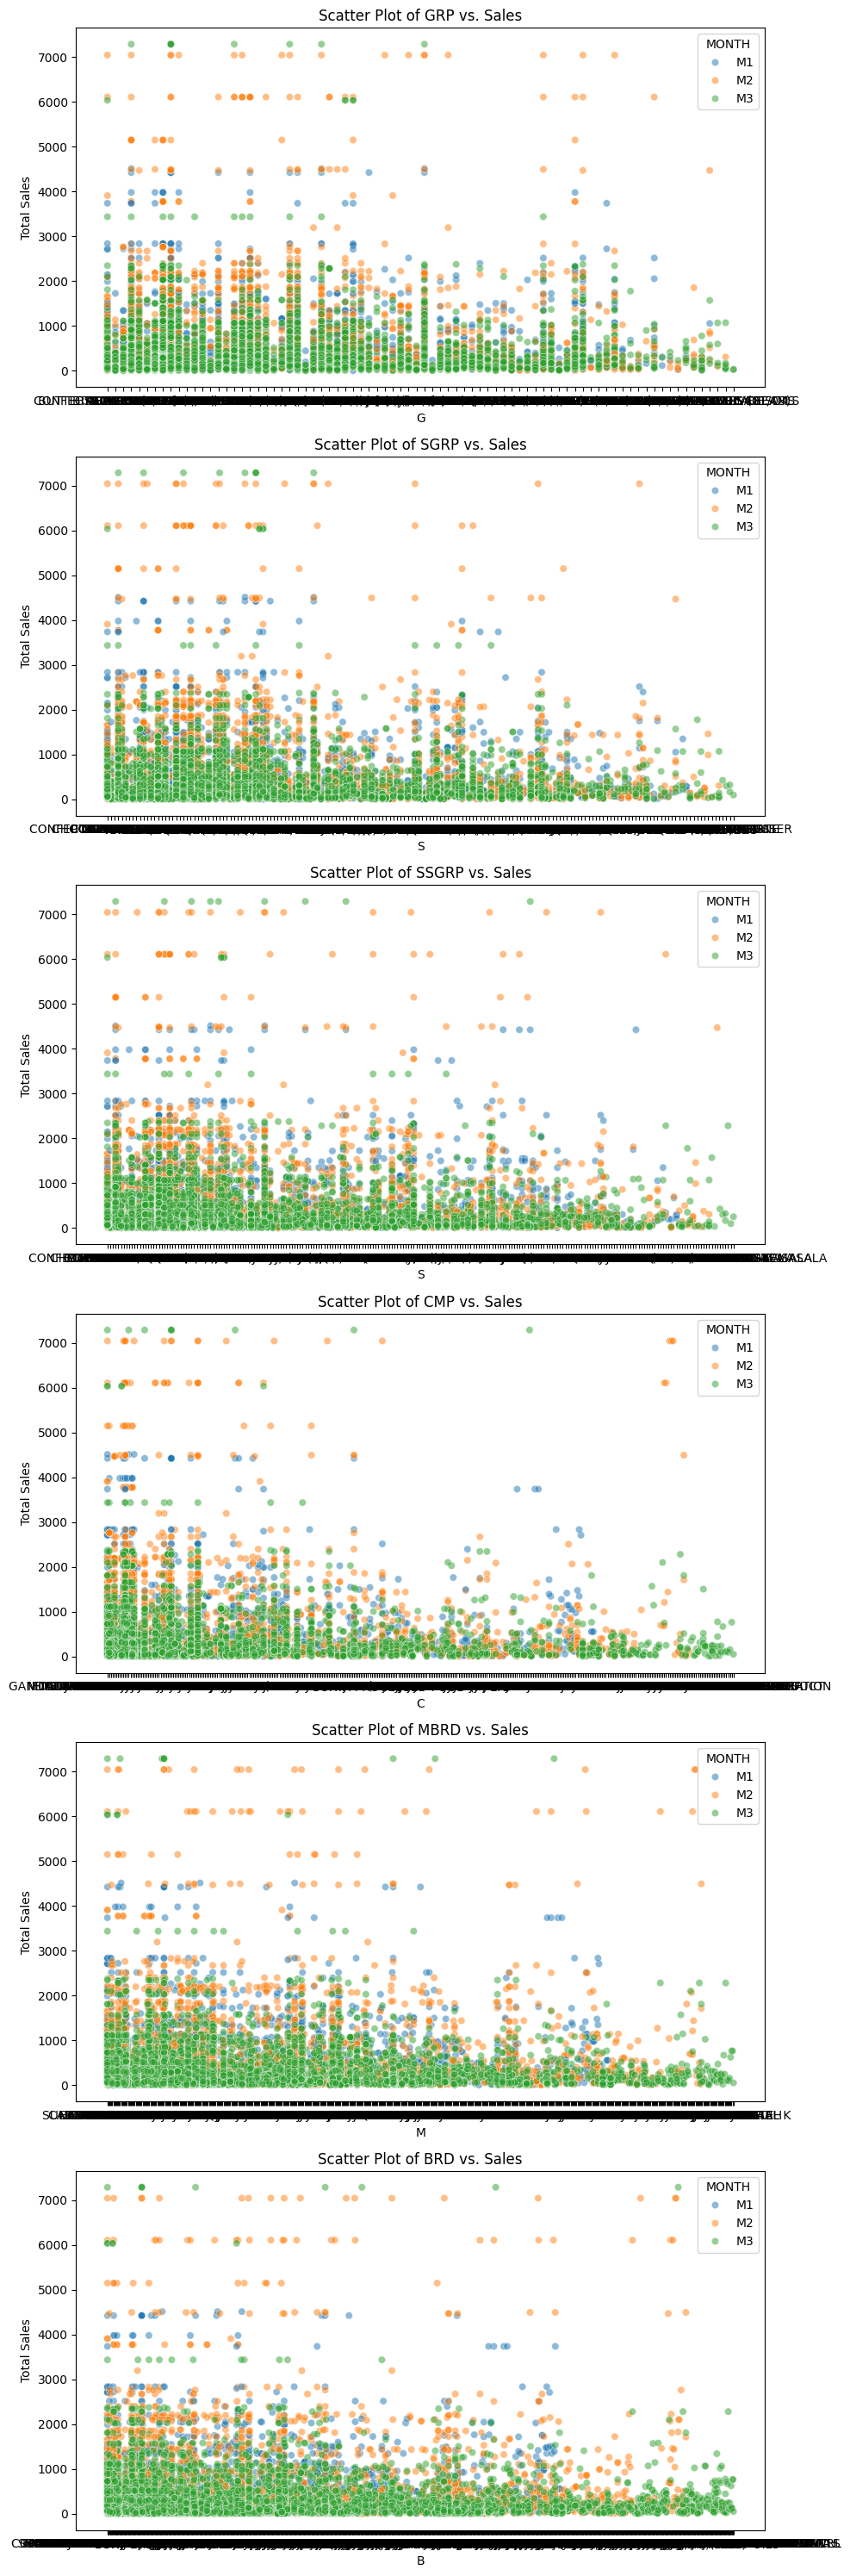

In [ ]:
# Create scatter plots for the selected column
import seaborn as sns
scatter_columns = ['GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD']
fig, axes = plt.subplots(nrows=len(scatter_columns), figsize=(10, 5 * len(scatter_columns)))
for i, column in enumerate(scatter_columns):
    sns.scatterplot(x=column, y='BILL_AMT', hue='MONTH', data=df, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Scatter Plot of {column} vs. Sales')
    axes[i].set_xlabel(column[0])
    axes[i].set_ylabel('Total Sales')
plt.tight_layout()
plt.show()

**Total sales of each store**

In [ ]:
total_sales_per_store = df.groupby('STORECODE')['PRICE'].sum()
for store_code, total_sales in total_sales_per_store.items():
    print(f"Store Code: {store_code}, Total Sales: {total_sales}")

Store Code: N1, Total Sales: 17249174.39
Store Code: N10, Total Sales: 340487.0
Store Code: N2, Total Sales: 6769695.0
Store Code: N3, Total Sales: 263846.79
Store Code: N4, Total Sales: 631869.01
Store Code: N5, Total Sales: 423393.0
Store Code: N6, Total Sales: 178547.0
Store Code: N7, Total Sales: 1162581.14
Store Code: N8, Total Sales: 352333.98
Store Code: N9, Total Sales: 624267.09


The below visualization is for the total sales of each store calculated based on the sum of prices

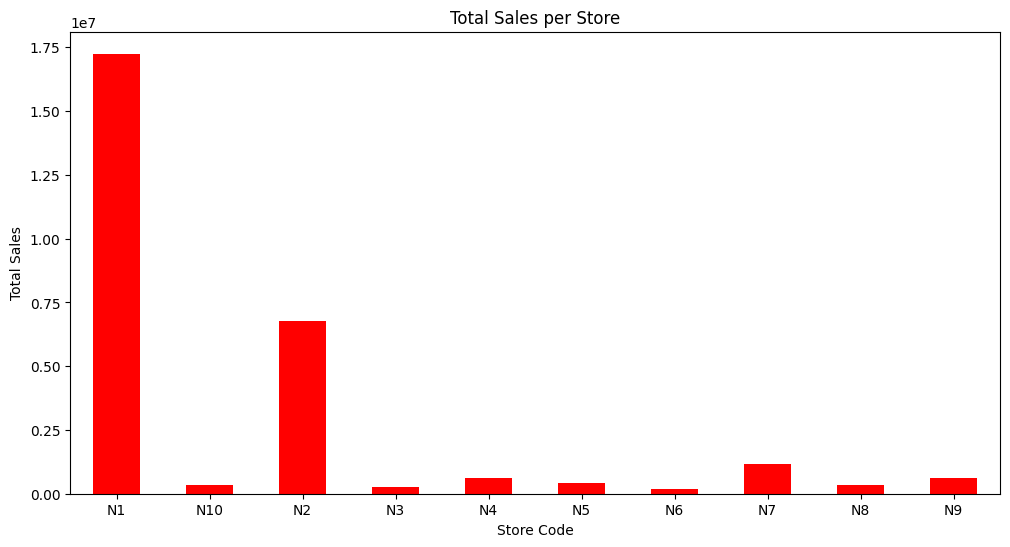

In [ ]:
total_sales_per_store = df.groupby('STORECODE')['PRICE'].sum()
plt.figure(figsize=(12, 6))
total_sales_per_store.plot(kind='bar', color='red')
plt.title('Total Sales per Store')
plt.xlabel('Store Code')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

**Visualization of Top 5 Selling Product Categories**

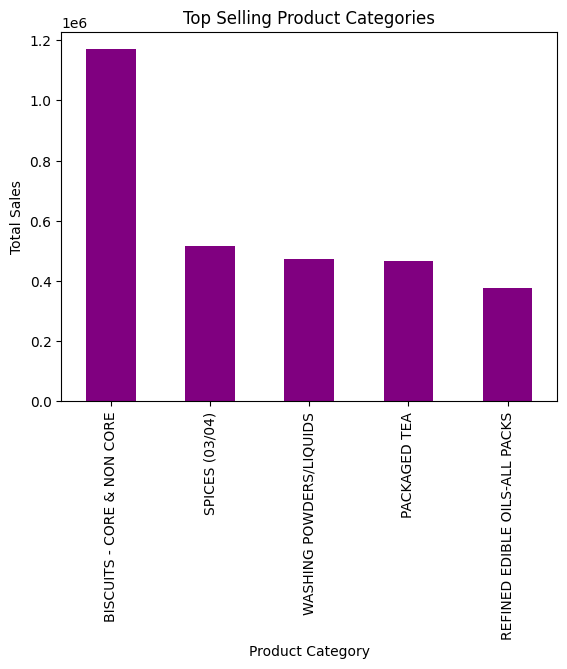

In [ ]:
top_categories = df.groupby('GRP')['BILL_AMT'].sum().nlargest(5)
top_categories.plot(kind='bar', color='purple')
plt.title('Top Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

**Visualization of Top 10 Brands**

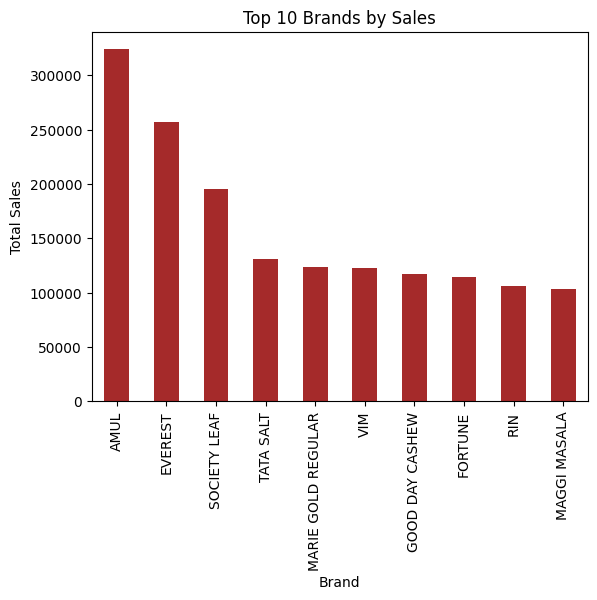

In [ ]:
brand_wise_sales = df.groupby('BRD')['BILL_AMT'].sum().nlargest(10)
brand_wise_sales.plot(kind='bar', color='brown')
plt.title('Top 10 Brands by Sales')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.show()


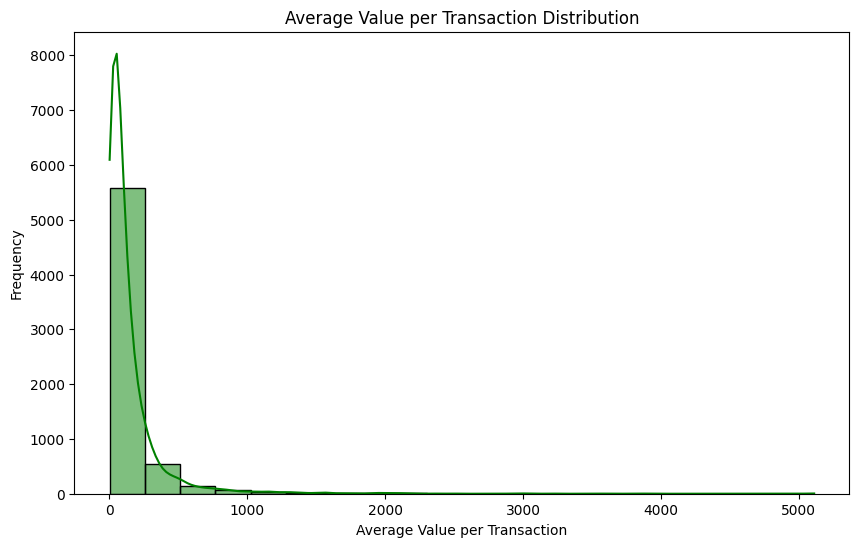

In [ ]:
import seaborn as sns
average_value_per_transaction = df.groupby('BILL_ID')['BILL_AMT'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(average_value_per_transaction, bins=20, kde=True, color='green')
plt.title('Average Value per Transaction Distribution')
plt.xlabel('Average Value per Transaction')
plt.ylabel('Frequency')
plt.show()